# Práctica 1.1 ejercicios: Muestreo, Cuantización, Reconstrucción y solapamiento

## Introducción

En esta práctica, resolverás una serie de ejercicios que involucran los conceptos de muestreo, cuantización, reconstrucción y aliasing. Cada ejercicio se ha diseñado para que profundices en la aplicación de estos conceptos.

---

### Ejercicio 1: Muestreo de señales de múltiples frecuencias

**Objetivo**: Muestrear una señal que es la suma de múltiples sinusoides de diferentes frecuencias y observar el efecto del aliasing.

1. Define una señal que sea la suma de tres sinusoides con frecuencias de $f_1 = 5 Hz$, $f_2 = 20 Hz$ y $f_3 = 50 Hz$.
2. Muestrea la señal a una frecuencia de muestreo inferior y superior a la frecuencia de Nyquist para la componente de 50 Hz.
3. Visualiza la señal muestreada y observa los efectos del aliasing.
4. Visualiza la señal recuperada en cada uno de los casos y calcula el error entre la señal original y la señal recuperada.

**Código inicial**:

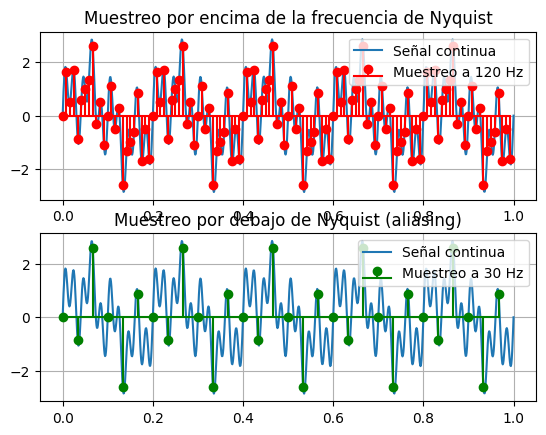

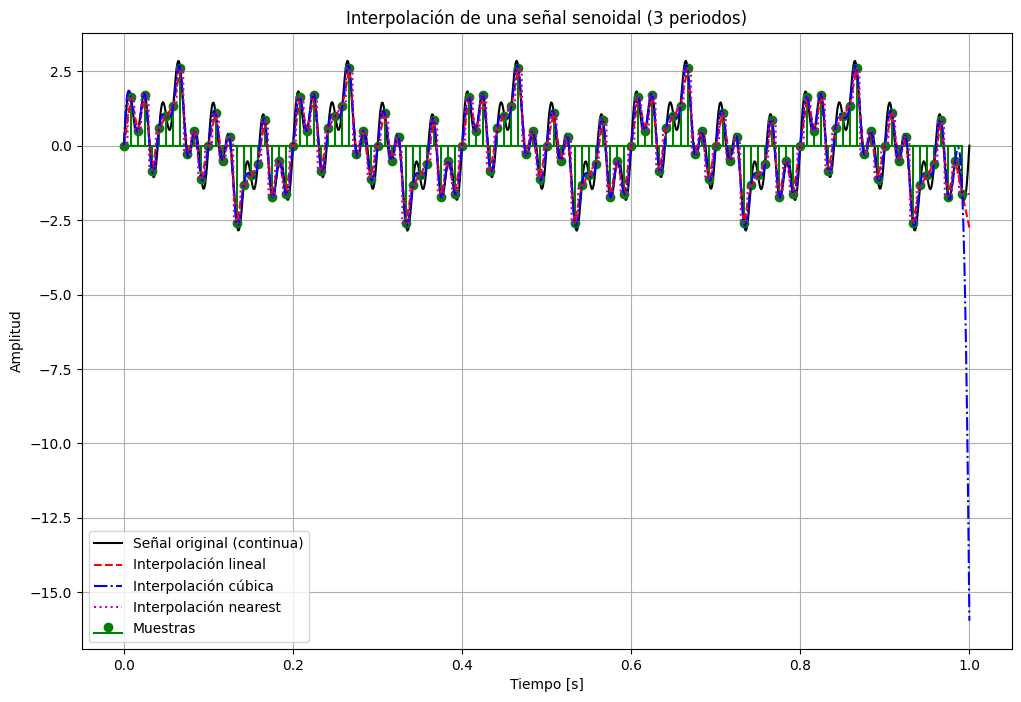

Error de reconstrucción lineal:  0.162864
Error de reconstrucción cúbica:  0.653724
Error de reconstrucción nearest: 0.307585


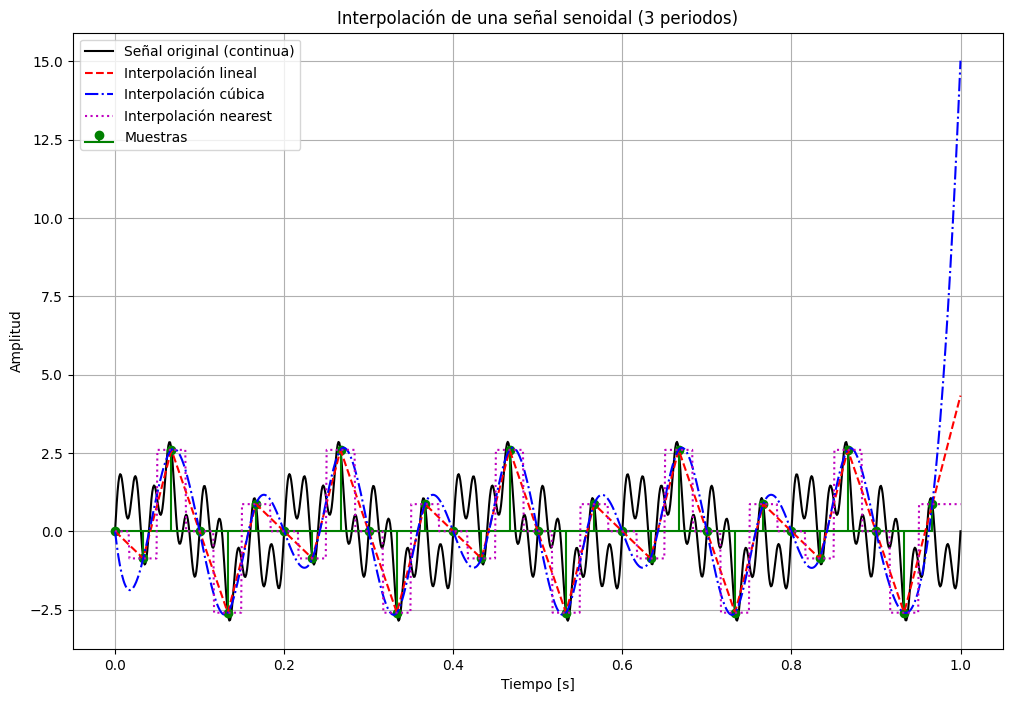

Error de reconstrucción lineal:  2.025895
Error de reconstrucción cúbica:  5.361884
Error de reconstrucción nearest: 2.590470


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


#Apartado 1 definimos la señal
# Parámetros de la señal
f1, f2, f3 = 5, 20, 50  # Frecuencias de las componentes sinusoidales en Hz
t_cont = np.linspace(0, 1, 1000)  # Tiempo continuo (1 segundo) array de 0,1 en mil divisiones
x_cont = np.sin(2 * np.pi * f1 * t_cont) + np.sin(2 * np.pi * f2 * t_cont) + np.sin(2 * np.pi * f3 * t_cont)  # Señal original

#Apartado 2
Fs2 = 30
Fs1 = 120

#Función para muestrear la señal
def sample_signal(f1,f2,f3, Fs, t_max=1, shift=0):
    """
    f: frecuencia de la señal
    Fs: frecuencia de muestreo
    t_max: duración total
    shift: desplazamiento temporal (en segundos)
    """
    t_samples = np.arange(shift, t_max, 1/Fs)
    x_samples =  np.sin(2 * np.pi * f1 * t_samples) + np.sin(2 * np.pi * f2 * t_samples) + np.sin(2 * np.pi * f3 * t_samples)
    return t_samples, x_samples
#Utilizamos la función para obtener los valores y representar
t_s1, x_s1 = sample_signal(f1,f2,f3, Fs1)
t_s2, x_s2 = sample_signal(f1,f2,f3, Fs2)

#Apartado 3
#Representamos el muestreo por encima de la frecuencia de Nyquist
plt.subplot(2, 1, 1)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s1, x_s1, linefmt='r-', markerfmt='ro', basefmt='r-', label=f'Muestreo a {Fs1} Hz')
plt.title('Muestreo por encima de la frecuencia de Nyquist')
plt.legend()
plt.grid(True)

#Representamos el muestro por debajo de la frecuencia de Nyqyist
plt.subplot(2, 1, 2)
plt.plot(t_cont, x_cont, label='Señal continua')
plt.stem(t_s2, x_s2, linefmt='g-', markerfmt='go', basefmt='g-', label=f'Muestreo a {Fs2} Hz')
plt.title('Muestreo por debajo de Nyquist (aliasing)')
plt.legend()
plt.grid(True)

#Apartado 4
#Recuperamos la señal primero para la que está por encima de la frecuencia

# Interpolaciones clásicas
lin_rec = interp1d(t_s1, x_s1, kind='linear', fill_value="extrapolate")
cub_rec = interp1d(t_s1, x_s1, kind='cubic', fill_value="extrapolate")
near_rec = interp1d(t_s1, x_s1, kind='nearest', fill_value="extrapolate")

x_lin = lin_rec(t_cont)
x_cub = cub_rec(t_cont)
x_near = near_rec(t_cont)

# Visualización comparativa
plt.figure(figsize=(12, 8))
plt.plot(t_cont, x_cont, 'k-', label='Señal original (continua)')
plt.stem(t_s1, x_s1, linefmt='g-', markerfmt='go', basefmt='g-', label='Muestras')
plt.plot(t_cont, x_lin, 'r--', label='Interpolación lineal')
plt.plot(t_cont, x_cub, 'b-.', label='Interpolación cúbica')
plt.plot(t_cont, x_near, 'm:', label='Interpolación nearest')
plt.title('Interpolación de una señal senoidal (3 periodos)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#Calculo de errores
err_lineal = np.mean((x_lin - x_cont)**2)
err_cub = np.mean((x_cub - x_cont)**2)
err_near = np.mean((x_near - x_cont)**2)


print(f"Error de reconstrucción lineal:  {err_lineal:.6f}")
print(f"Error de reconstrucción cúbica:  {err_cub:.6f}")
print(f"Error de reconstrucción nearest: {err_near:.6f}")

#Recuperamos la señal de la que está por debajo de la frecuencia Nyquist
# Interpolaciones clásicas
lin_rec = interp1d(t_s2, x_s2, kind='linear', fill_value="extrapolate")
cub_rec = interp1d(t_s2, x_s2, kind='cubic', fill_value="extrapolate")
near_rec = interp1d(t_s2, x_s2, kind='nearest', fill_value="extrapolate")

x_lin = lin_rec(t_cont)
x_cub = cub_rec(t_cont)
x_near = near_rec(t_cont)

# Visualización comparativa
plt.figure(figsize=(12, 8))
plt.plot(t_cont, x_cont, 'k-', label='Señal original (continua)')
plt.stem(t_s2, x_s2, linefmt='g-', markerfmt='go', basefmt='g-', label='Muestras')
plt.plot(t_cont, x_lin, 'r--', label='Interpolación lineal')
plt.plot(t_cont, x_cub, 'b-.', label='Interpolación cúbica')
plt.plot(t_cont, x_near, 'm:', label='Interpolación nearest')
plt.title('Interpolación de una señal senoidal (3 periodos)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#Calculo de errores
err_lineal = np.mean((x_lin - x_cont)**2)
err_cub = np.mean((x_cub - x_cont)**2)
err_near = np.mean((x_near - x_cont)**2)


print(f"Error de reconstrucción lineal:  {err_lineal:.6f}")
print(f"Error de reconstrucción cúbica:  {err_cub:.6f}")
print(f"Error de reconstrucción nearest: {err_near:.6f}")

#Primera pregunta
#30 / 2
#5 Hz: está por debajo de 15 Hz → NO sufre aliasing (se mantiene como 5 Hz).
#20 Hz: está por encima de 15 Hz → SÍ sufre aliasing.
#50 Hz: está muy por encima de 15 Hz → SÍ sufre aliasing

#Segunda pregunta
#Subir la frecuencia de muestreo o aplicar un filtro de paso bajo antes de muestreas


**Preguntas**:
- ¿Qué componentes de la señal se ven afectadas por el aliasing?
- ¿Cómo podrías evitar el aliasing en esta situación?

---

### Ejercicio 2: Cuantización con diferentes niveles

**Objetivo**: Cuantizar una señal sinusoidal usando diferentes números de niveles y observar el impacto en la precisión.

1. Cuantiza la señal del apartado anterior con un cuantizador de 3, 5 y 10 bits.
2. Indica en cada cada caso los parámetros del cuantizador (número de niveles, rando dinámico, paso de cuantización,...)
2. Visualiza la señal original y las señales cuantizadas.
3. Calcula el error de cuantización para cada caso.

**Código inicial**:

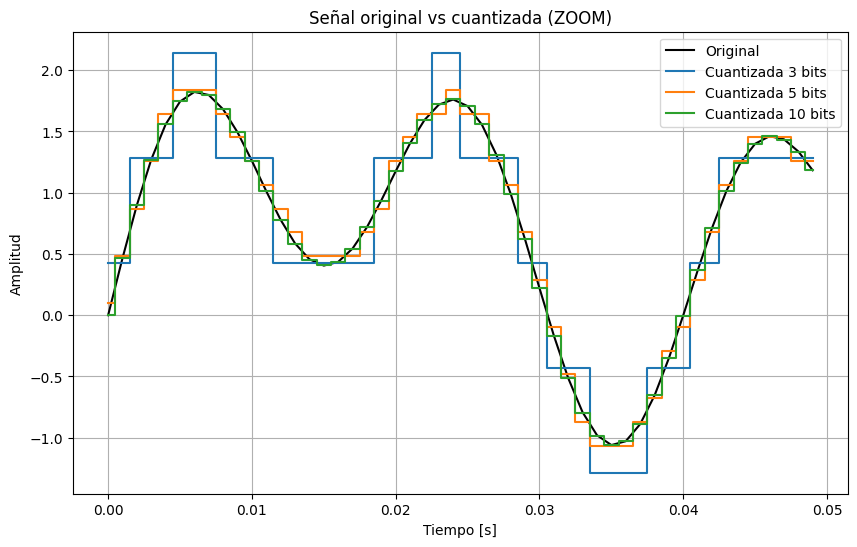


Cuantizador 3 bits:
  Niveles (L)      = 8
  Rango dinámico   = [-3.0, 3.0] (ancho = 6.0)
  Paso (Δ)         = 0.857143
  Error MSE        = 5.872726e-02
  Error RMSE       = 2.423371e-01
  Error max |e|    = 4.285714e-01

Cuantizador 5 bits:
  Niveles (L)      = 32
  Rango dinámico   = [-3.0, 3.0] (ancho = 6.0)
  Paso (Δ)         = 0.193548
  Error MSE        = 3.857063e-03
  Error RMSE       = 6.210526e-02
  Error max |e|    = 9.677419e-02

Cuantizador 10 bits:
  Niveles (L)      = 1024
  Rango dinámico   = [-3.0, 3.0] (ancho = 6.0)
  Paso (Δ)         = 0.005865
  Error MSE        = 3.070104e-06
  Error RMSE       = 1.752171e-03
  Error max |e|    = 2.932551e-03


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1) Señal del ejercicio 1
# -------------------------
f1, f2, f3 = 5, 20, 50
t_max = 1.0               # 1 segundo
Fs = 1000                 # muestreo alto para "referencia"
t_s = np.arange(0, t_max, 1/Fs)

x_s = (np.sin(2*np.pi*f1*t_s) +
       np.sin(2*np.pi*f2*t_s) +
       np.sin(2*np.pi*f3*t_s))

# Rango dinámico (para esta señal suma de 3 senos)
xmin, xmax = -3.0, 3.0

# -------------------------
# 2) Cuantizador (tu estilo)
# -------------------------
def cuantizador(x, xmin, xmax, num_levels):
    delta = (xmax - xmin) / (num_levels - 1)  # mejor: incluye extremos
    x_clip = np.clip(x, xmin, xmax)
    x_q = np.round((x_clip - xmin) / delta) * delta + xmin
    x_q = np.clip(x_q, xmin, xmax)
    return x_q, delta

# -------------------------
# 3) Cuantizar con 3, 5, 10 bits
# -------------------------
bits_list = [3, 5, 10]
resultados = {}

for b in bits_list:
    num_levels = 2**b
    x_q, delta = cuantizador(x_s, xmin, xmax, num_levels)

    # Error de cuantización
    mse = np.mean((x_s - x_q)**2)
    rmse = np.sqrt(mse)
    emax = np.max(np.abs(x_s - x_q))

    resultados[b] = {
        "num_levels": num_levels,
        "delta": delta,
        "x_q": x_q,
        "mse": mse,
        "rmse": rmse,
        "emax": emax
    }

# -------------------------
# 4) Visualización con zoom (para que se vea)
# -------------------------
# Zoom a los primeros 0.05 s
idx = t_s < 0.05

plt.figure(figsize=(10, 6))
plt.plot(t_s[idx], x_s[idx], 'k-', label='Original')

for b in bits_list:
    plt.step(t_s[idx], resultados[b]["x_q"][idx], where='mid', label=f'Cuantizada {b} bits')

plt.title('Señal original vs cuantizada (ZOOM)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
# 5) Mostrar parámetros del cuantizador y errores
# -------------------------
for b in bits_list:
    L = resultados[b]["num_levels"]
    delta = resultados[b]["delta"]
    mse = resultados[b]["mse"]
    rmse = resultados[b]["rmse"]
    emax = resultados[b]["emax"]

    print(f"\nCuantizador {b} bits:")
    print(f"  Niveles (L)      = {L}")
    print(f"  Rango dinámico   = [{xmin}, {xmax}] (ancho = {xmax-xmin})")
    print(f"  Paso (Δ)         = {delta:.6f}")
    print(f"  Error MSE        = {mse:.6e}")
    print(f"  Error RMSE       = {rmse:.6e}")
    print(f"  Error max |e|    = {emax:.6e}")

# Pregunta 1
#Con 3 bits: señal “a escalones” muy marcada, error grande.
#Con 5 bits: escalones más finos, error baja bastante.
#Con 10 bits: casi no notas escalones, error muy pequeño.

#Pregunta 2
#Cuando el número de niveles de cuantización es demasiado bajo, el paso de cuantización aumenta,
#produciendo una señal cuantizada con fuertes escalones y un error de cuantización elevado, que se manifiesta como ruido y pérdida de información.


**Preguntas**:
- ¿Cómo afecta el número de niveles de cuantización al error?
- ¿Qué sucede cuando el número de niveles es demasiado bajo?

---

### Ejercicio 3: Reconstrucción de una señal usando interpolación

**Objetivo**: Reconstruir una señal muestreada utilizando diferentes métodos de interpolación y comparar los resultados.

1. Interpola la señal muestreada en el apartado 1 usando:
    - Interpolación lineal.
    - Interpolación cúbica.
    - Interpolación por sincs
3. Visualiza la señal original, la señal muestreada y las señales reconstruidas con los diferentes métodos de interpolación.
3. Calcula el error de reconstrucción para cada uno de los métodos de interpolación utilizados y valores de Fs.

**Código inicial**:


Fs = 120 Hz
  RMSE lineal : 4.035643e-01
  RMSE cúbica : 8.085319e-01
  RMSE sinc   : 6.386831e-02


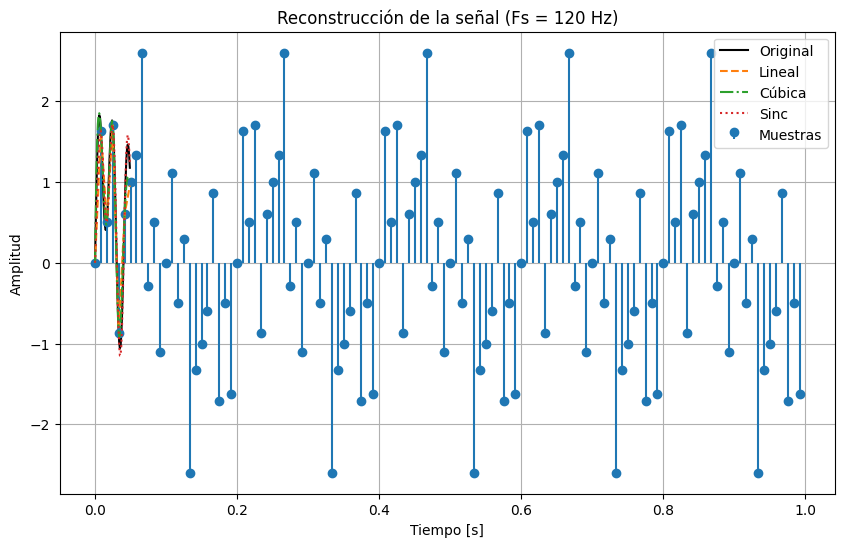


Fs = 30 Hz
  RMSE lineal : 1.423340e+00
  RMSE cúbica : 2.315574e+00
  RMSE sinc   : 1.725197e+00


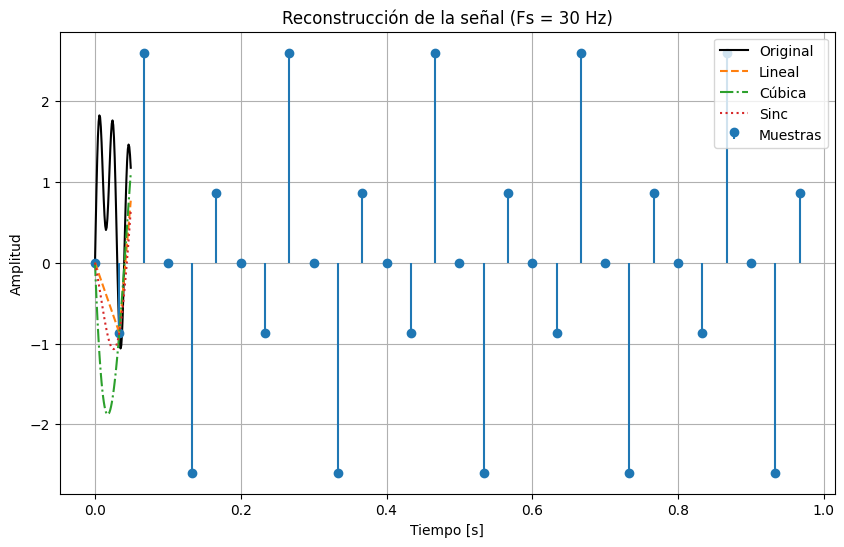

RMSE lineal: 1.4233395435351652
RMSE cúbica: 2.3155741583801084
RMSE sinc  : 1.725197214780547


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Señal original (referencia "continua")
f1, f2, f3 = 5, 20, 50
t_cont = np.linspace(0, 1, 1000)

x_cont = (np.sin(2*np.pi*f1*t_cont) +
          np.sin(2*np.pi*f2*t_cont) +
          np.sin(2*np.pi*f3*t_cont))

#Muestreo
Fs_list = [120, 30]  # > Nyquist y < Nyquist

def sample_signal(x_func, Fs, t_max=1):
    t_s = np.arange(0, t_max, 1/Fs)
    x_s = (np.sin(2*np.pi*f1*t_s) +
           np.sin(2*np.pi*f2*t_s) +
           np.sin(2*np.pi*f3*t_s))
    return t_s, x_s

#Interpolación
def interp_linear(t_s, x_s, t_cont):
    return interp1d(t_s, x_s, kind='linear', fill_value="extrapolate")(t_cont)

def interp_cubic(t_s, x_s, t_cont):
    return interp1d(t_s, x_s, kind='cubic', fill_value="extrapolate")(t_cont)

def sinc_interpolacion(t, ts, xs):
    x_rec = np.zeros_like(t)
    Ts = ts[1] - ts[0]
    for i in range(len(xs)):
        x_rec += xs[i] * np.sinc((t - ts[i]) / Ts)
    return x_rec

def rmse(x, x_hat):
    return np.sqrt(np.mean((x - x_hat)**2))

for Fs in Fs_list:
    t_s, x_s = sample_signal(x_cont, Fs)

    x_lin  = interp_linear(t_s, x_s, t_cont)
    x_cub  = interp_cubic(t_s, x_s, t_cont)
    x_sinc = sinc_interpolacion(t_cont, t_s, x_s)

    # Errores
    err_lin  = rmse(x_cont, x_lin)
    err_cub  = rmse(x_cont, x_cub)
    err_sinc = rmse(x_cont, x_sinc)

    print(f"\nFs = {Fs} Hz")
    print(f"  RMSE lineal : {err_lin:.6e}")
    print(f"  RMSE cúbica : {err_cub:.6e}")
    print(f"  RMSE sinc   : {err_sinc:.6e}")

    # Visualización (zoom para que se vea)
    idx = t_cont < 0.05

    plt.figure(figsize=(10,6))
    plt.plot(t_cont[idx], x_cont[idx], 'k', label='Original')
    plt.stem(t_s, x_s, basefmt=" ", label='Muestras')
    plt.plot(t_cont[idx], x_lin[idx], '--', label='Lineal')
    plt.plot(t_cont[idx], x_cub[idx], '-.', label='Cúbica')
    plt.plot(t_cont[idx], x_sinc[idx], ':', label='Sinc')
    plt.title(f'Reconstrucción de la señal (Fs = {Fs} Hz)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    plt.show()
#Preguntas
#Al aumentar la frecuencia de muestreo, la reconstrucción mejora y el error disminuye. Cuando FS
#supera la frecuencia de Nyquist (≥ 100 Hz en este caso), la interpolación por sinc suele dar el menor error.
#Por debajo de Nyquist, el aliasing impide recuperar la señal original, independientemente del método de interpolación.



**Preguntas**:
- ¿Cuál método de interpolación se acerca más a la señal original? Calcule el error entre la señal reconstruida y la señal original.
- ¿Cómo cambia la calidad de la reconstrucción al aumentar la frecuencia de muestreo?

---

### Ejercicio 4: Estudio del aliasing en señales de alta frecuencia

**Objetivo**: Estudiar el aliasing cuando una señal de alta frecuencia es muestreada por debajo de la frecuencia de Nyquist.

1. Muestrea la señal del primer apartado a 30 Hz.
2. Visualiza la señal original y la señal muestreada.
3. Calcula el valor de la frecuencia aparente debido al solapamiento y compara esos valores con las representaciones gráficas obtenidas.

**Código inicial**:

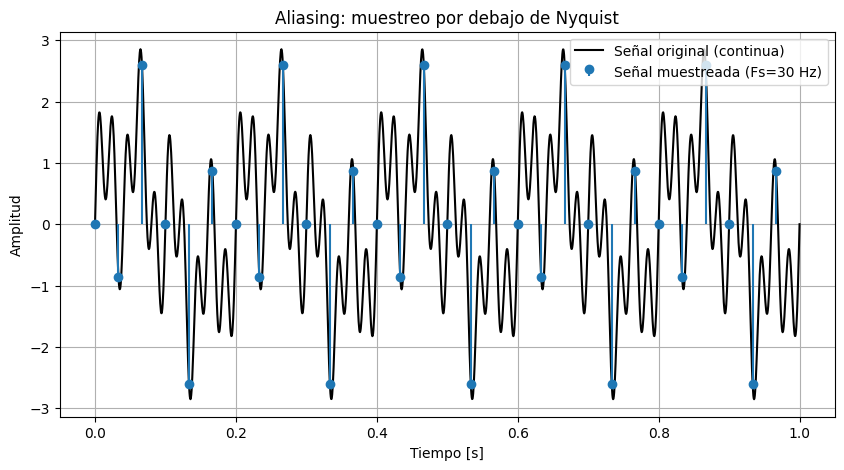

Fs = 30 Hz, Nyquist = 15.0 Hz

Componente  5 Hz -> NO aliasing (se ve como 5.0 Hz)
Componente 20 Hz -> ALIASING (se ve como 10.0 Hz)
Componente 50 Hz -> ALIASING (se ve como 10.0 Hz)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Señal del apartado 1
# -------------------------
f1, f2, f3 = 5, 20, 50

t_cont = np.linspace(0, 1, 2000)  # "continua" para visualizar bien
x_cont = (np.sin(2*np.pi*f1*t_cont) +
          np.sin(2*np.pi*f2*t_cont) +
          np.sin(2*np.pi*f3*t_cont))

# -------------------------
# Muestreo a Fs = 30 Hz
# -------------------------
Fs = 30
t_s = np.arange(0, 1, 1/Fs)
x_s = (np.sin(2*np.pi*f1*t_s) +
       np.sin(2*np.pi*f2*t_s) +
       np.sin(2*np.pi*f3*t_s))

# -------------------------
# Visualización: original vs muestreada
# -------------------------
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, 'k-', label='Señal original (continua)')
plt.stem(t_s, x_s, basefmt=" ", label=f'Señal muestreada (Fs={Fs} Hz)')
plt.title('Aliasing: muestreo por debajo de Nyquist')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# Cálculo de frecuencia aparente (alias)
# -------------------------
def alias_frequency(f, Fs):
    """
    Devuelve la frecuencia aparente en [0, Fs/2] al muestrear a Fs.
    """
    # plegado modular a [0, Fs)
    r = f % Fs
    # plegado a [0, Fs/2]
    return min(r, Fs - r)

freqs = [f1, f2, f3]
print(f"Fs = {Fs} Hz, Nyquist = {Fs/2} Hz\n")

for f in freqs:
    f_alias = alias_frequency(f, Fs)
    if f <= Fs/2:
        print(f"Componente {f:>2} Hz -> NO aliasing (se ve como {f_alias:.1f} Hz)")
    else:
        print(f"Componente {f:>2} Hz -> ALIASING (se ve como {f_alias:.1f} Hz)")


**Preguntas**:
- ¿Cuál es la frecuencia aparente debido al aliasing?
La de 20 y 50
- ¿Qué frecuencia de muestreo sería suficiente para evitar aliasing?
mayor que 100
